<a href="https://colab.research.google.com/github/sarathkumar271002/Customer-Segmentation-Using-Clustering---KMeans/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_excel('/content/Online Retail.xlsx')

# **Data observation**

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [41]:
df.shape

(541909, 8)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [43]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [44]:
df.duplicated().sum()

np.int64(5268)

# **EDA - Exploratory Data Analysis**

In [45]:
# df.describe().T
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [46]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [47]:
df.Country.value_counts()

,count
Country,
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519


Handling Duplicate data:

In [48]:
df.drop_duplicates(keep='first',inplace=True)

Handling missing data :

In [51]:
df.dropna(inplace=True)
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Handling outliers :

In [52]:
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)
iqr = q3-q1

In [53]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
df = df.loc[(df['Quantity'] < upper_limit) & (df['Quantity'] > lower_limit)]

In [54]:
q1 = df['UnitPrice'].quantile(0.25)
q3 = df['UnitPrice'].quantile(0.75)
iqr = q3 - q1

In [55]:
upper_limit = q3 + (1.5*iqr)
lower_limit = q1 - (1.5*iqr)
df = df.loc[(df['UnitPrice'] < upper_limit) & (df['UnitPrice'] > lower_limit)]

# **Encoding**

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
X = df[['Quantity', 'UnitPrice', 'Country']].copy()
encoder = LabelEncoder()
X['Country'] = encoder.fit_transform(X['Country'])

In [59]:
X.head()

,Quantity,UnitPrice,Country
0,6,2.55,35
1,6,3.39,35
2,8,2.75,35
3,6,3.39,35
4,6,3.39,35


# **Feature Engineering**

In [62]:
X['Total_price'] = X['Quantity'] * X['UnitPrice']
X.head()

,Quantity,UnitPrice,Country,Total_price
0,6,2.55,35,15.30
1,6,3.39,35,20.34
2,8,2.75,35,22.00
3,6,3.39,35,20.34
4,6,3.39,35,20.34


# **Correlation**

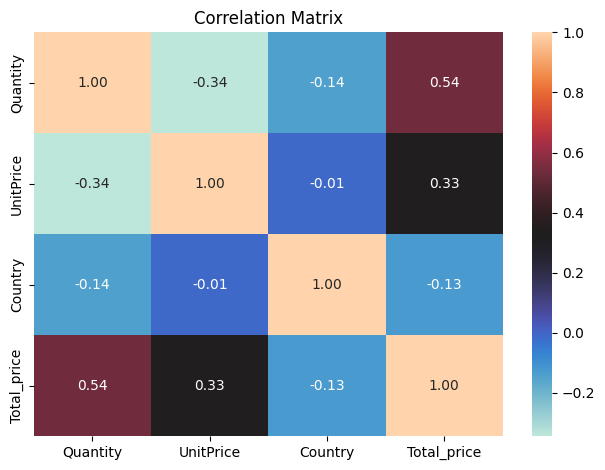

In [64]:
corr = X.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire")# fmt formats the displayed values to 2 decimal places
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# **Model Training**

In [68]:
from sklearn.cluster import KMeans

In [73]:
wcss = [] #Within Cluster Sum of Squares
for i in range(2, 11):
  model = KMeans(i)
  model.fit(X)
  wcss.append(model.inertia_)

In [71]:
print(wcss)

[57456428.68110028, 38556613.498059705, 31642081.356966816, 21047283.125108127, 16892372.52954609, 16340655.386604827, 15299543.677187685, 12479197.204343317, 11406937.647815114]


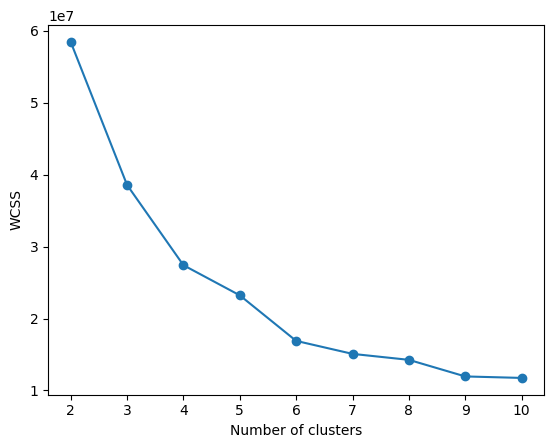

In [75]:
plt.plot(range(2,11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [76]:
model = KMeans(6)
model.fit(X)

KMeans(n_clusters=6)

In [85]:
identify_cluster=model.fit_predict(X)
identify_cluster

array([3, 3, 3, ..., 4, 4, 4], dtype=int32)

In [87]:
X['cluster'] = identify_cluster
X

,Quantity,UnitPrice,Country,Total_price,cluster
0,6,2.55,35,15.30,3
1,6,3.39,35,20.34,3
2,8,2.75,35,22.00,3
3,6,3.39,35,20.34,3
4,6,3.39,35,20.34,3
...,...,...,...,...,...
541904,12,0.85,13,10.20,4
541905,6,2.10,13,12.60,4
541906,4,4.15,13,16.60,4
541907,4,4.15,13,16.60,4


In [89]:
X.cluster.value_counts()

,count
cluster,
0,151099
3,111550
1,26288
4,24341
2,19708
5,5791
